<a href="https://colab.research.google.com/github/Rubianodaniel/Awesome-Profile-README-templates/blob/master/union_consolidado_mm_PRISMAS_km0%2B900_models_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASAS PR
## realizar la selección de datos para calculos de tasa e inverso de la velocidad.


### importar las librerias a trabajar

In [ ]:
!pip install openpyxl==3.0.9


In [ ]:
pip install xlsxwriter

In [ ]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import drive
import sklearn

from sklearn.linear_model import (RANSACRegressor,HuberRegressor)
from sklearn.svm import SVR
from sklearn.model_selection import (
    cross_val_score, KFold
    )


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import (r2_score)
import xlsxwriter

drive.mount ('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/integral/tasaskm0+900'
!ls

/content/drive/My Drive/Colab Notebooks/integral/tasaskm0+900
 Clima_20220207_131605.csv		       PCS_MI.xlsm
 CONSOLIDADO_2.xlsx			      'PRISMAS KM0+900V1.xlsx'
 consolidado_sf.xlsm			      'PRISMAS KM0+900.xlsx'
'DASH CAVE.pbix'			       tasas.xlsx
'Historico PrismasMonitoreo_km0+900_CMT.csv'


# Ruta de acceso al archivo.

In [ ]:
path='/content/drive/My Drive/Colab Notebooks/integral/tasaskm0+900/{}'

df_pr=pd.read_csv(path.format("Historico PrismasMonitoreo_km0+900_CMT.csv"),sep=",")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,9,22,23,24,27,28,29,32,33,34,37,38,39,52,53,54,67,68,69,82,83,84,87,88,89) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Formato y particion de la base de datos en dataFrames DATOS inferiores a 13/09/2021


In [ ]:
def pr_130921(df,n,nombre):

  """ 
  Esta funcion revibe como paramentros:
        .un nombre de un dataframe a crear ejemplo "dfPR1" y debe ser un string
        .un numero n que en este caso seria el identificador en la base de datos, ejemplo=[PointID_2] donde 2 es n
        -nombre es un string debe ser el mismo que el primer parametro solamente que solo va a tomar valores de string mientras que el primer parametro se convierte en un Datframe
  
        PASOS
        1 una vez definido el parametro df este pasa a ser un dataframe de nuestra base de datos original vamos a tomar solamente las columnas con el identificador n
        2 renombrar las columnas 
        3 reemplazar valores de nan y espacion en blanco con np.nan y despues eliminar los np.nan
        4 cambiar el formato de cada columna en nuestro dataframe 
        5 usando un filtro mask accedo solamente a los datos de 23 de diciembre de 2021 fecha en la que ya se habia hecho el cero relativo
        6 si el parametro nombre esta en los diccionarios k y J  entonces seleccionar el valor de la llave que tenga el mismo valor del parametro nombre
        7 calcular las columnas diferencia de desplazamiento y Desplazamiento_h
        8 retornar el dataframe
  """
  
  df=df_pr.loc[:,['[PointID_'+str(n)+']','[DateTime_'+ str(n)+']','[ddX_'+ str(n)+'][mm]', '[ddY_'+ str(n)+'][mm]', '[ddZ_'+ str(n)+'][mm]']]
  df.rename(columns={'[PointID_'+str(n)+']':"ID INSTRUMENTO",'[DateTime_'+ str(n)+']':"TIMESTAMP",
                     '[ddX_'+ str(n)+'][mm]':"DELTA_X",'[ddY_'+ str(n)+'][mm]':"DELTA_Y",'[ddZ_'+ str(n)+'][mm]':"DELTA_Z"},inplace=True)
  df=df.replace(to_replace=np.nan, value=np.nan)
  df=df.replace(to_replace=" ", value=np.nan)
  df=df.dropna()
  df = df.astype({"DELTA_X":'float64', "DELTA_Y":'float64',"DELTA_Z":'float64'}) 
  df['TIMESTAMP']=pd.to_datetime(df["TIMESTAMP"],dayfirst=True)
  
                   

  mask = (df['TIMESTAMP'] <= "2021-09-13")
  df=df.loc[mask]
  df=df.sort_values(['TIMESTAMP'])
  df=df.reset_index()
  df=df.drop("index",axis=1)
  


  df["DELTA_X"]=df["DELTA_X"]/10
  df["DELTA_Y"]=df["DELTA_Y"]/10
  df["DELTA_Z"]=df["DELTA_Z"]/10

  df['Desplazamiento_h']= (np.sqrt(df['DELTA_X']**2+ df['DELTA_Y']**2))
  df["Asentamiento"] = df["DELTA_Z"]
  
 

  # df["MMPONDERADA"] = df['Desplazamiento_h'].rolling(30).apply(lambda x: np.dot(x,w)/w.sum(), raw=True)
  # df["MMPONDERADA DELTAX"] = df['DELTA_X'].rolling(30).apply(lambda x: np.dot(x,w)/w.sum(), raw=True)
   
  
  
  return(df)

llamado a la funcion pr_130921

In [ ]:
df_PR1=pr_130921("df_PRKM1",6,"df_PRKM1")
df_PR2=pr_130921("df_PRKM2",7,"df_PRKM2")
df_PR3=pr_130921("df_PRKM3",8,"df_PRKM3")
df_PR4=pr_130921("df_PRKM4",9,"df_PRKM4")
df_PR5=pr_130921("df_PRKM5",10,"df_PRKM5")
df_PR6=pr_130921("df_PRKM6",11,"df_PRKM6")
df_PR7=pr_130921("df_PRKM7",12,"df_PRKM7")
# dfPR8=pr_130921("df_PRKM8",13,"df_PRKM8")
df_PR9=pr_130921("df_PRKM9",14,"df_PRKM9")
# dfPR10=pr_130921("df_PRKM10",15,"df_PRKM10")
# dfPR11=pr_130921("df_PRKM11",16,"df_PRKM11")
df_PR12=pr_130921("df_PRKM12",17,"df_PRKM12")
df_PR13=pr_130921("df_PRKM13",18,"df_PRKM13")
df_PR14=pr_130921("df_PRKM14",19,"df_PRKM14")
# dfPR16=pr_130921("df_PRKM16",20,"df_PRKM16")
df_PR17=pr_130921("df_PRKM17",21,"df_PRKM17")
df_PR18=pr_130921("df_PRKM18",22,"df_PRKM18")



#Formato y particion de la base de datos en dataFrames DATOS DESDE 2021-12-23

In [ ]:
def pr_(df,n,nombre):

  """ 
  Esta funcion revibe como paramentros:
        .un nombre de un dataframe a crear ejemplo "dfPR1" y debe ser un string
        .un numero n que en este caso seria el identificador en la base de datos, ejemplo=[PointID_2] donde 2 es n
        -nombre es un string debe ser el mismo que el primer parametro solamente que solo va a tomar valores de string mientras que el primer parametro se convierte en un Datframe
  
        PASOS
        1 una vez definido el parametro df este pasa a ser un dataframe de nuestra base de datos original vamos a tomar solamente las columnas con el identificador n
        2 renombrar las columnas 
        3 reemplazar valores de nan y espacion en blanco con np.nan y despues eliminar los np.nan
        4 cambiar el formato de cada columna en nuestro dataframe 
        5 usando un filtro mask accedo solamente a los datos de 23 de diciembre de 2021 fecha en la que ya se habia hecho el cero relativo
        6 si el parametro nombre esta en los diccionarios k y J  entonces seleccionar el valor de la llave que tenga el mismo valor del parametro nombre
        7 calcular las columnas diferencia de desplazamiento y Desplazamiento_h
        8 retornar el dataframe
  """
  
  df=df_pr.loc[:,['[PointID_'+str(n)+']','[DateTime_'+ str(n)+']','[ddX_'+ str(n)+'][mm]', '[ddY_'+ str(n)+'][mm]', '[ddZ_'+ str(n)+'][mm]']]
  df.rename(columns={'[PointID_'+str(n)+']':"ID INSTRUMENTO",'[DateTime_'+ str(n)+']':"TIMESTAMP",
                     '[ddX_'+ str(n)+'][mm]':"DELTA_X",'[ddY_'+ str(n)+'][mm]':"DELTA_Y",'[ddZ_'+ str(n)+'][mm]':"DELTA_Z"},inplace=True)
  df=df.replace(to_replace=np.nan, value=np.nan)
  df=df.replace(to_replace=" ", value=np.nan)
  df=df.dropna()
  df = df.astype({"DELTA_X":'float64', "DELTA_Y":'float64',"DELTA_Z":'float64'}) 
  df['TIMESTAMP']=pd.to_datetime(df["TIMESTAMP"],dayfirst=True)
  
  
                                 

  mask = (df['TIMESTAMP'] >= "2021-12-23")
  df=df.loc[mask]
  df=df.sort_values(['TIMESTAMP'])
  df=df.reset_index()
  df=df.drop("index",axis=1)
  
  #constante diferencia de desplazamiento
  k={'df_PRKM1':0.939,'df_PRKM2':1.744,'df_PRKM3':14.896,'df_PRKM5':2.909,'df_PRKM6':2.817,'df_PRKM7':136.827,'df_PRKM9':1.275,
     'df_PRKM12':174.294,'df_PRKM13':169.110,'df_PRKM14':147.967,
     'df_PRKM4':3.501,'df_PRKM17':120.205,'df_PRKM18':79.07}
  #constante desplazamiento_H
  j={'df_PRKM1':9.240,'df_PRKM2':8.552,'df_PRKM3':21.556,'df_PRKM5':13.132,'df_PRKM6':9.873,'df_PRKM7':72.740,'df_PRKM9':6.574,
     'df_PRKM12':138.145,'df_PRKM13':133.346,'df_PRKM14':121.791,
     'df_PRKM4':16.688,'df_PRKM17':67.662,'df_PRKM18':47.042}
  
  #constante asentamiento
  r={'df_PRKM1':-0.8224632959704,'df_PRKM2':5.16255824443344,'df_PRKM3':-0.996443039358376,'df_PRKM5':2.24834417205284,'df_PRKM6':1.25466615216625,'df_PRKM7':-115.396632535719,'df_PRKM9':1.59193465101594,
    'df_PRKM12':-62.1559471762692,'df_PRKM13':-62.4184943955934,'df_PRKM14':-27.3838125811721,
    'df_PRKM4':-4.67258090859078,'df_PRKM17':-16.8129236306048,'df_PRKM18':-11.6532667423665}

  #constante diferencia de asentamiento
  s={'df_PRKM1':0.443547368421053,'df_PRKM2':-0.0907947368421053,'df_PRKM3':-1.13318888888889,'df_PRKM5':-0.151511111111111,'df_PRKM6':0.442931578947368,'df_PRKM7':-239.7998,'df_PRKM9':0.29119375,
    'df_PRKM12':-92.4708263157895,'df_PRKM13':-94.5292058823529,'df_PRKM14':-93.8941666666667,
    'df_PRKM4':2.2478,'df_PRKM17':-84.68948,'df_PRKM18':-56.79465}

  
  if nombre in k:
    m=k[nombre]

    i=j[nombre]

    c_asentamiento= r[nombre]

    c_diferencia_asentamiento=s[nombre]

  else:
    m=0
    i=0
    c_asentamiento=0
    c_diferencia_asentamiento=0

  df['diferencia de desplazamiento']= (np.sqrt(df['DELTA_X']**2+ df['DELTA_Y']**2)/10)
  df['Desplazamiento_h']= (df['diferencia de desplazamiento']-m)+i
  df["diferencia de asentamiento"]=df["DELTA_Z"]/10
  df["Asentamiento"] = (df["diferencia de asentamiento"]-c_diferencia_asentamiento)+c_asentamiento
  


  # df["MMPONDERADA"] = df['Desplazamiento_h'].rolling(30).apply(lambda x: np.dot(x,w)/w.sum(), raw=True)
  # df["MMPONDERADA DELTAX"] = df['DELTA_X'].rolling(30).apply(lambda x: np.dot(x,w)/w.sum(), raw=True)
   
  
  
  return(df)

llamado a la función PR_

In [ ]:
dfPR1=pr_("df_PRKM1",6,"df_PRKM1")
dfPR2=pr_("df_PRKM2",7,"df_PRKM2")
dfPR3=pr_("df_PRKM3",8,"df_PRKM3")
dfPR4=pr_("df_PRKM4",9,"df_PRKM4")
dfPR5=pr_("df_PRKM5",10,"df_PRKM5")
dfPR6=pr_("df_PRKM6",11,"df_PRKM6")
dfPR7=pr_("df_PRKM7",12,"df_PRKM7")
# dfPR8=pr_("df_PRKM8",13,"df_PRKM8")
dfPR9=pr_("df_PRKM9",14,"df_PRKM9")
# dfPR10=pr_("df_PRKM10",15,"df_PRKM10")
# dfPR11=pr_("df_PRKM11",16,"df_PRKM11")
dfPR12=pr_("df_PRKM12",17,"df_PRKM12")
dfPR13=pr_("df_PRKM13",18,"df_PRKM13")
dfPR14=pr_("df_PRKM14",19,"df_PRKM14")
# dfPR16=pr_("df_PRKM16",20,"df_PRKM16")
dfPR17=pr_("df_PRKM17",21,"df_PRKM17")
dfPR18=pr_("df_PRKM18",22,"df_PRKM18")
dfPR23=pr_("df_PRKM23",23,"df_PRKM23")
dfPR24=pr_("df_PRKM24",24,"df_PRKM24")
dfPR25=pr_("df_PRKM25",25,"df_PRKM25")
dfPR28=pr_("df_PRKM25",26,"df_PRKM25")





#consolidado_sf

### Conexión a archivo consolidado_sf

In [ ]:
path2='/content/drive/My Drive/Colab Notebooks/integral/tasaskm0+900/{}'
df_prismas=pd.read_excel(path2.format("consolidado_sf.xlsm"), sheet_name = "Datos")
df_prismas.head()
df_prismas.drop([0,1],axis=0,inplace=True)


### Formato al los datos archivo **consolidado_Sf**



In [ ]:
df_prismas1=df_prismas[[1,6,20,34,48,62,76,90,117,157,171,185,221,235,297,309,321,357]]
df_prismas1=df_prismas1.rename(columns={1:"TIMESTAMP",6:"PRKM1",20:"PRKM2",34:"PRKM3",48:"PRKM4",62:"PRKM5",76:"PRKM6",90:"PRKM7",
                              117:"PRKM9",157:"PRKM12",171:"PRKM13",185:"PRKM14",
                              221:"PRKM17",235:"PRKM18",297:"PRKM23",309:"PRKM24",321:"PRKM25",357:"PRKM28"})

df_prismas1=df_prismas1.replace(to_replace="NaN", value=np.nan)
df_prismas1=df_prismas1.replace(to_replace=np.nan, value=np.nan)
df_prismas1 = df_prismas1.astype({"PRKM1":"float64","PRKM2":"float64","PRKM3":"float64","PRKM4":"float64","PRKM5":"float64","PRKM6":"float64","PRKM7":"float64",
                "PRKM9":"float64","PRKM12":"float64","PRKM13":"float64","PRKM14":"float64",
                "PRKM17":"float64","PRKM18":"float64","PRKM23":"float64","PRKM24":"float64","PRKM25":"float64","PRKM28":"float64"})
df_prismas1['TIMESTAMP']=pd.to_datetime(df_prismas1["TIMESTAMP"],dayfirst=True)
# mask = (df_prismas1['TIMESTAMP'] >= "2021-12-23")
# df_prismas2=df_prismas1.loc[mask]
df_prismas1=df_prismas1.sort_values(['TIMESTAMP'])
df_prismas1=df_prismas1.reset_index()
df_prismas1=df_prismas1.drop("index",axis=1)


#UNIÓN DE LOS DATAFRAMES ANTERIORMENTE OBTENIDOS
Se concatena los datframes anteriormente obtenidos para obtener solo un dato para la media movil

In [ ]:
prisma1=pd.concat([df_PR1,dfPR1])
prisma2=pd.concat([df_PR2,dfPR2])
prisma3=pd.concat([df_PR3,dfPR3])
prisma4=pd.concat([df_PR4,dfPR4])
prisma5=pd.concat([df_PR5,dfPR5])
prisma6=pd.concat([df_PR6,dfPR6])
prisma7=pd.concat([df_PR7,dfPR7])
prisma9=pd.concat([df_PR9,dfPR9])
prisma12=pd.concat([df_PR12,dfPR12])
prisma13=pd.concat([df_PR13,dfPR13])
prisma14=pd.concat([df_PR14,dfPR14])
prisma17=pd.concat([df_PR17,dfPR17])
prisma18=pd.concat([df_PR18,dfPR18])
prisma23=dfPR23
prisma24=dfPR24
prisma25=dfPR25
prisma28=dfPR28








#Media Movil simple


In [ ]:
def MMS(df,nombre):
    """
    esta funcion sirve para calcular la media movil simple

    recibe como parametros:
       el nombre del dataframe 
       el nombre de la columna a la que queremos sacarle la media movil

      pasos:
        .se inicializa una lista vacia 
        .se inicializa las variables "j" e "i" con valores de 30 y 0 que es el rango de la ventana 
        .con un ciclo while obtenemos los 30 primeros datos le sacamos el promedio 
          y luego tomamos valores de 1:31 y le sacamos el promedio.
        . agregamos los valores del promedio en una lista llamada mms
    
    """
    
    mms=[]  
    i,j = 0,30

    while j < len(df[nombre]+4):
        y=df[nombre].iloc[i:j]
        y1=y.mean()
      
        
        i+=1
        j+=1
        mms.append(y1)
    return mms


#MEDIA MOVIL PONDERADA

In [ ]:
def MMP1_3F(df,nombre_de_columna):
    mmp=[]  
    i,j = 0,30

    while j < len(df[nombre_de_columna]+2):
        y=np.array(df[nombre_de_columna].iloc[i:j])
        x=y[27:30]
        w=[3,5,5]
        z=(x*w)
        y1=np.array(df[nombre_de_columna].iloc[i:j-3])
        y1=np.append(y1,z)
        y2=sum(y1)/(len(y1)+10)
        
        i+=1
        j+=1
        mmp.append(y2)
    return mmp


#MEDIAL MOVIL CENTRAL


In [ ]:
def mmcentral(df,nombre):
    mmc=[]  
    i,j = 3,33

    while j < len(df[nombre]+4):
        y=df[nombre].iloc[i:j]
        y1=y.mean()
      
        
        i+=1
        j+=1
        mmc.append(y1)
    return mmc


MEDIA MOVIL CENTRADA PONDERADA

In [ ]:
def MMCP(df,nombre_de_columna):
    mmp=[]  
    i,j = 3,33

    while j < len(df[nombre_de_columna]+4):
        y=np.array(df[nombre_de_columna].iloc[i:j])
        x=y[26:30]
        w=[3,4,3,4]
        z=(x*w)
        y1=np.array(df[nombre_de_columna].iloc[i:j-4])
        y1=np.append(y1,z)
        y2=sum(y1)/(len(y1)+10)
        
        i+=1
        j+=1
        mmp.append(y2)
    return mmp


In [ ]:
def medias_moviles(df,c_desplazamiento,asentamiento,c_Delta_X,c_Delta_Y,c_delta_Z):
  
  x=df["TIMESTAMP"]
  y=df["Desplazamiento_h"]
  nombre_prisma=np.array(df["ID INSTRUMENTO"].iloc[33::])
  Fecha=np.array(df["TIMESTAMP"].iloc[33::])

  #### desplazamiento
  mms1=np.array(MMS(df,c_desplazamiento))
  mmp1=np.array(MMP1_3F(df,c_desplazamiento))
  mmc1=np.array(mmcentral(df,c_desplazamiento))
  mmcp1=np.array(MMCP(df,c_desplazamiento))
  z=mms1[3::],mmp1[3::],mmc1,mmcp1
  promh=np.mean(z,axis=0)

    #### delta x
  mms=np.array(MMS(df,c_Delta_X))
  mmp=np.array(MMP1_3F(df,c_Delta_X))
  mmc=np.array(mmcentral(df,c_Delta_X))
  mmcp=np.array(MMCP(df,c_Delta_X))
  z=mms[3::],mmp[3::],mmc,mmcp
  prom_DELTAX=np.mean(z,axis=0)

     #### delta y
  mms=np.array(MMS(df,c_Delta_Y))
  mmp=np.array(MMP1_3F(df,c_Delta_Y))
  mmc=np.array(mmcentral(df,c_Delta_Y))
  mmcp=np.array(MMCP(df,c_Delta_Y))
  z=mms[3::],mmp[3::],mmc,mmcp
  prom_DELTAY=np.mean(z,axis=0)

  #### Asentamiento
  mms=np.array(MMS(df,asentamiento))
  mmp=np.array(MMP1_3F(df,asentamiento))
  mmc=np.array(mmcentral(df,asentamiento))
  mmcp=np.array(MMCP(df,asentamiento))
  z=mms[3::],mmp[3::],mmc,mmcp
  prom_asentamiento=np.mean(z,axis=0)

      #### delta Z
  mms=np.array(MMS(df,c_delta_Z))
  mmp=np.array(MMP1_3F(df,c_delta_Z))
  mmc=np.array(mmcentral(df,c_delta_Z))
  mmcp=np.array(MMCP(df,c_delta_Z))
  z=mms[3::],mmp[3::],mmc,mmcp
  prom_DELTAZ=np.mean(z,axis=0)




  # y1= np.array(df_prismas1[consolidado])
  # x1=np.array(df_prismas1["TIMESTAMP"])

  
  # plt.figure(figsize=(12,9))
  # plt.title(nombre_prisma[0],fontsize=20)
  
  # plt.plot(x,y,color="grey",linewidth=0.5)
  # plt.plot(x1,y1,color="blue")
  # # plt.plot(x.iloc[30::],mms1,color="red",label="mms")
  # # plt.plot(x.iloc[30::],mmp1,color="blue",label="mmp")

  # # plt.plot(x.iloc[33::],mmc1,color="yellow",label="mmc")
  # # plt.plot(x.iloc[33::],mmcp1,color="green",label="mmcp")
  # plt.plot(x.iloc[33::],promh,color="brown",label="promh",marker=".")
  # plt.legend(loc='upper right')
  # plt.ylabel=('Desplazamiento cm')
  # plt.grid()
 

  return Fecha,nombre_prisma,promh,prom_asentamiento,prom_DELTAX,prom_DELTAY,prom_DELTAZ

#Función datos_procesados
esta función llama a todas las medias moviles de los dataframes crudos y crea un nuevo dataframe con los promedios de las medias moviles

In [ ]:
def datos_procesados(df):
    PR=medias_moviles(df,"Desplazamiento_h","Asentamiento","DELTA_X","DELTA_Y","DELTA_Z")
    columnas={"TIMESTAMP":PR[0],"ID INSTRUMENTO":PR[1],"prom desplazamiento_h":PR[2],"prom_asentamiento":[3],"prom DELTA X":PR[4],"prom DELTA Y":PR[5],"prom DELTA Z":PR[6]}
    indice=np.arange(len(PR[2]))
    PR=pd.DataFrame(data=columnas,index=indice)
    return PR

DATOS PROCESADOS DESDE EL INICIO HASTA EL 13/09/2021

In [ ]:
PR1=datos_procesados(df_PR1)
# PR2=datos_procesados(df_PR2)
# PR3=datos_procesados(df_PR3)
# PR4=datos_procesados(df_PR4)
# PR5=datos_procesados(df_PR5)
# PR6=datos_procesados(df_PR6)
# PR7=datos_procesados(df_PR7)
# PR9=datos_procesados(df_PR9)
# PR12=datos_procesados(df_PR12)
# PR13=datos_procesados(df_PR13)
# PR14=datos_procesados(df_PR14)
# PR17=datos_procesados(df_PR17)
# PR18=datos_procesados(df_PR18)



DATOS PROCESADOS DESDE EL 23/12/2021

In [ ]:
PR1_1=datos_procesados(dfPR1)
PR2_1=datos_procesados(dfPR2)
PR3_1=datos_procesados(dfPR3)
PR4_1=datos_procesados(dfPR4)
PR5_1=datos_procesados(dfPR5)
PR6_1=datos_procesados(dfPR6)
PR7_1=datos_procesados(dfPR7)
PR9_1=datos_procesados(dfPR9)
PR12_1=datos_procesados(dfPR12)
PR13_1=datos_procesados(dfPR13)
PR14_1=datos_procesados(dfPR14)
PR17_1=datos_procesados(dfPR17)
PR18_1=datos_procesados(dfPR18)
PR23_1=datos_procesados(dfPR23)
PR24_1=datos_procesados(dfPR24)
PR25_1=datos_procesados(dfPR25)
PR28_1=datos_procesados(dfPR28)





#Concatenar los datos de los dataframes llamados en las dos funciones anteriores.

In [ ]:
PR1=pd.concat([PR1,PR1_1],axis=0)
PR2=pd.concat([PR2,PR2_1],axis=0)
PR3=pd.concat([PR3,PR3_1],axis=0)
PR4=pd.concat([PR4,PR4_1],axis=0)
PR5=pd.concat([PR5,PR5_1],axis=0)
PR6=pd.concat([PR6,PR6_1],axis=0)
PR7=pd.concat([PR7,PR7_1],axis=0)
PR9=pd.concat([PR9,PR9_1],axis=0)
PR12=pd.concat([PR12,PR12_1],axis=0)
PR13=pd.concat([PR13,PR13_1],axis=0)
PR14=pd.concat([PR14,PR14_1],axis=0)
PR17=pd.concat([PR17,PR17_1],axis=0)
PR18=pd.concat([PR18,PR18_1],axis=0)
PR23=PR23_1
PR24=PR24_1
PR25=PR25_1
PR28=PR28_1


#GRAFICAS

In [ ]:
def graficas(df,df2,consolidado):
 
  x = df["TIMESTAMP"]
  y = df["Desplazamiento_h"]
  x1 = df2["TIMESTAMP"]
  y1 = df2["prom desplazamiento_h"]
  x2 = df_prismas1["TIMESTAMP"]
  y2 = df_prismas1[consolidado]
  
  nombre_prisma=np.array(df["ID INSTRUMENTO"].iloc[0])
 
  plt.figure(figsize=(9,6))
  plt.title(nombre_prisma,fontsize=20)
  plt.legend(["Desplazamiento_h","prom desplazamiento_h","consolidado"],loc='upper right')
  plt.ylabel=('Desplazamiento (cm)')

  plt.plot(x,y,color="grey",linewidth=0.5)
  plt.plot(x1,y1,color="red",marker=".",linewidth=0.1)
  plt.plot(x2,y2,color="green")
  plt.grid()

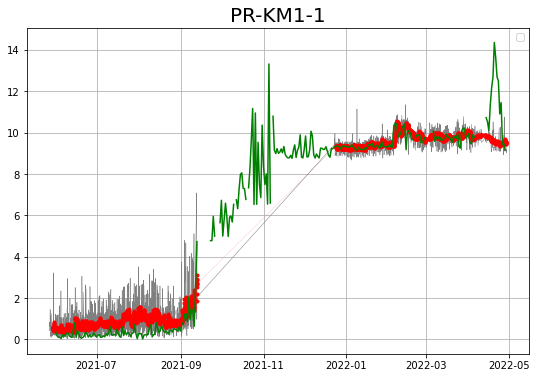

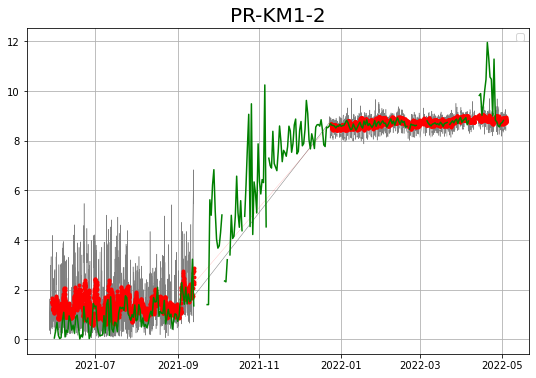

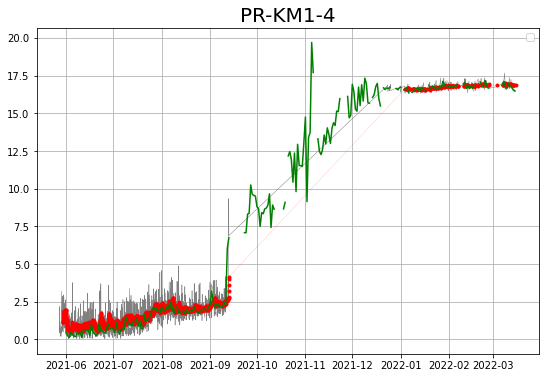

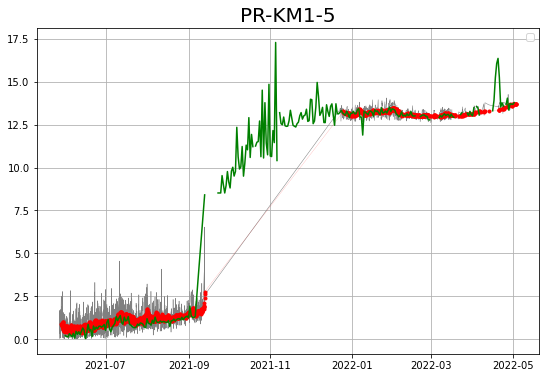

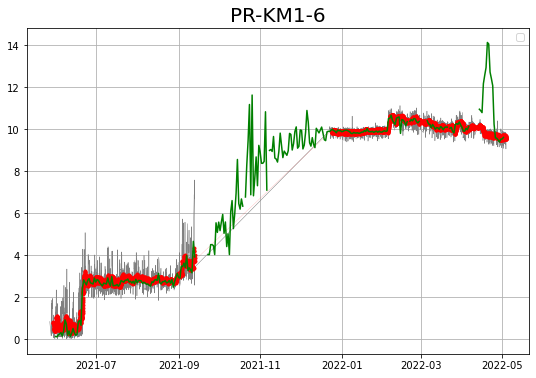

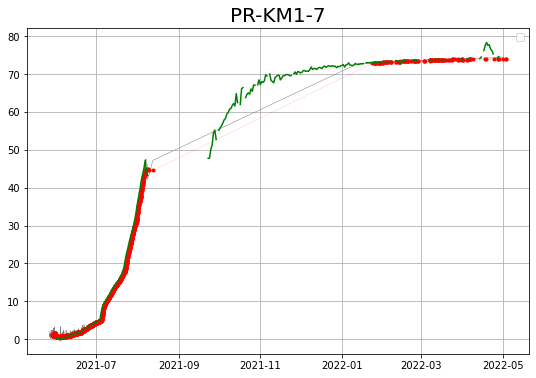

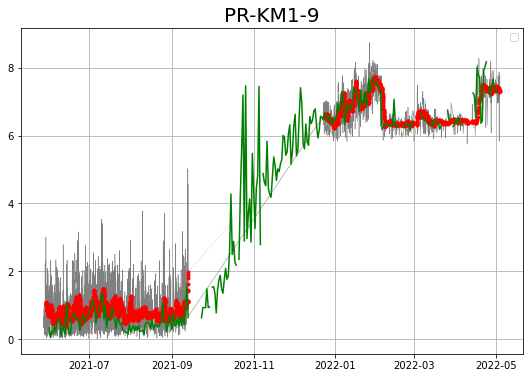

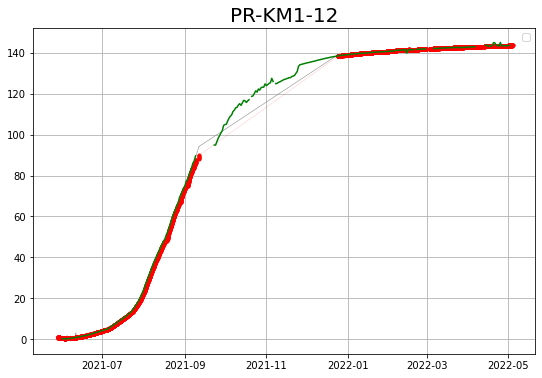

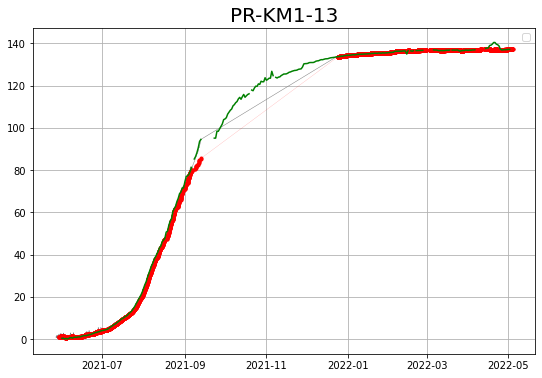

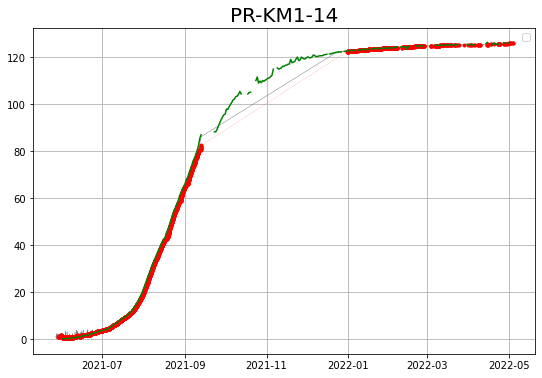

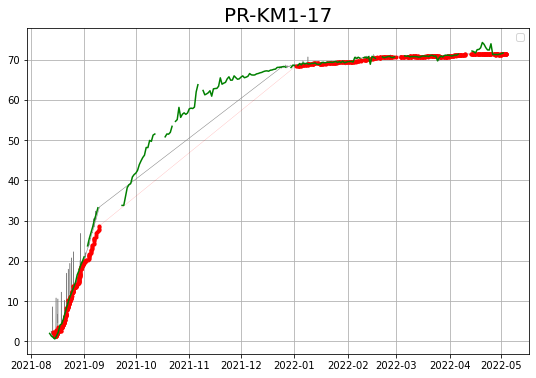

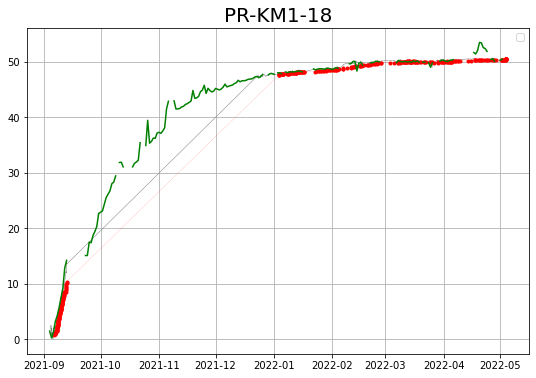

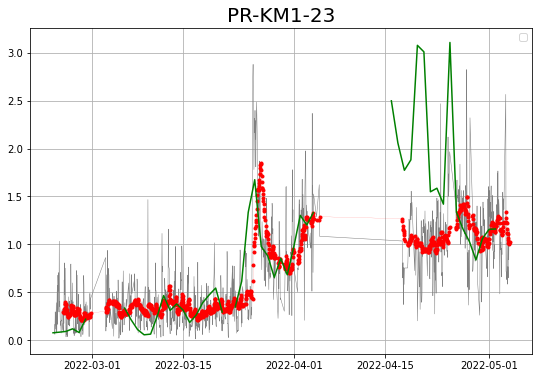

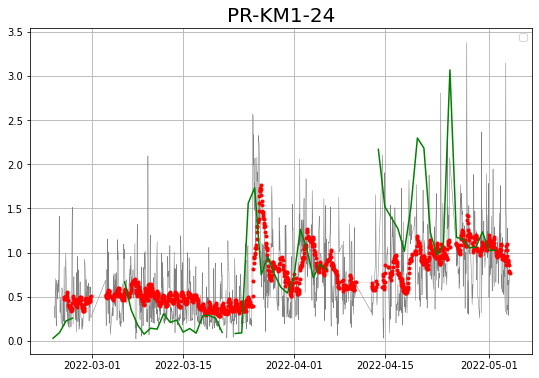

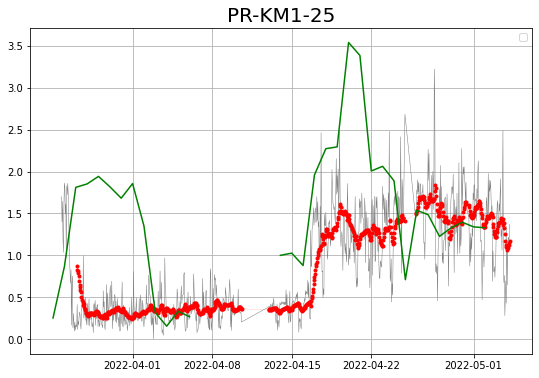

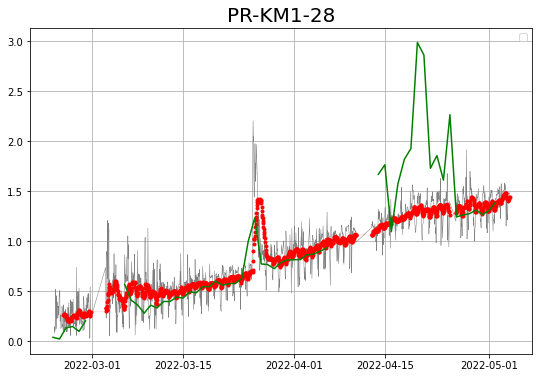

In [ ]:
grafica1=graficas(prisma1,PR1,"PRKM1")
grafica1=graficas(prisma2,PR2,"PRKM2")
# grafica1=graficas(prisma3,PR3,"PRKM3")
grafica1=graficas(prisma4,PR4,"PRKM4")
grafica1=graficas(prisma5,PR5,"PRKM5")
grafica1=graficas(prisma6,PR6,"PRKM6")
grafica1=graficas(prisma7,PR7,"PRKM7")
grafica1=graficas(prisma9,PR9,"PRKM9")
grafica1=graficas(prisma12,PR12,"PRKM12")
grafica1=graficas(prisma13,PR13,"PRKM13")
grafica1=graficas(prisma14,PR14,"PRKM14")
grafica1=graficas(prisma17,PR17,"PRKM17")
grafica1=graficas(prisma18,PR18,"PRKM18")
grafica1=graficas(prisma23,PR23,"PRKM23")
grafica1=graficas(prisma24,PR24,"PRKM24")
grafica1=graficas(prisma25,PR25,"PRKM25")
grafica1=graficas(prisma28,PR28,"PRKM28")


In [ ]:
PR1

,TIMESTAMP,ID INSTRUMENTO,prom desplazamiento_h,prom DELTA X,prom DELTA Y,prom DELTA Z
0,2021-05-29 18:00:00,PR-KM1-1,0.601811,-0.095477,-0.035918,0.042250
1,2021-05-29 19:00:00,PR-KM1-1,0.582403,-0.087232,-0.018133,0.038288
2,2021-05-29 20:00:00,PR-KM1-1,0.582167,-0.046253,0.028215,0.038386
3,2021-05-29 21:00:00,PR-KM1-1,0.549881,-0.033573,0.035069,0.026910
4,2021-05-29 22:00:00,PR-KM1-1,0.527669,-0.027453,0.020924,0.012917
...,...,...,...,...,...,...
1815,2022-04-28 16:00:00,PR-KM1-1,9.532857,8.100550,-7.673781,4.264254
1816,2022-04-28 17:00:00,PR-KM1-1,9.502919,7.707027,-7.785002,3.664383
1817,2022-04-28 18:00:00,PR-KM1-1,9.483762,7.470702,-7.827021,3.471240
1818,2022-04-28 19:00:00,PR-KM1-1,9.469998,7.315448,-7.772025,3.066400


In [ ]:
def graficas_asentamiento(df,df2):
 
  x = df["TIMESTAMP"]
  y = df["Asentamiento"]

  x1 = df2["TIMESTAMP"]
  y1 = df2["prom DELTA Z"]

  nombre_prisma=np.array(df["ID INSTRUMENTO"].iloc[0])
 
  plt.figure(figsize=(9,6))
  plt.title(nombre_prisma,fontsize=20)
 

  plt.plot(x,y,color="grey",linewidth=0.5)
  plt.plot(x1,y1,color="red",marker=".",linewidth=0.1)
  
  plt.grid()

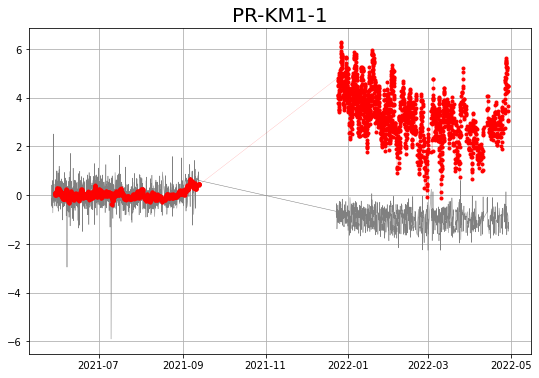

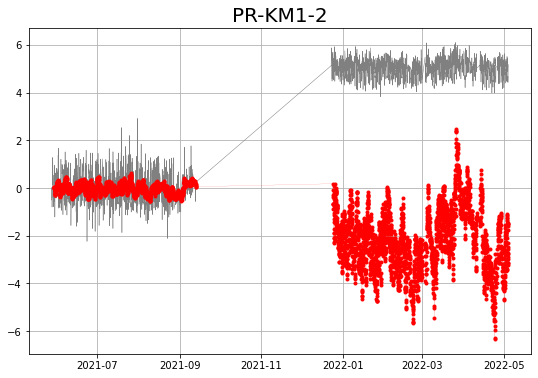

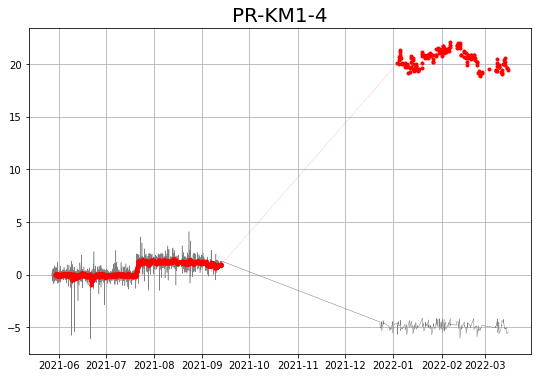

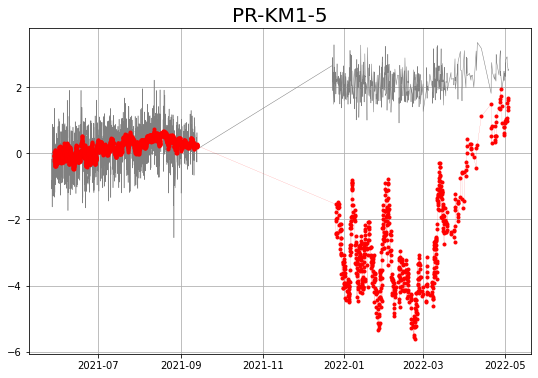

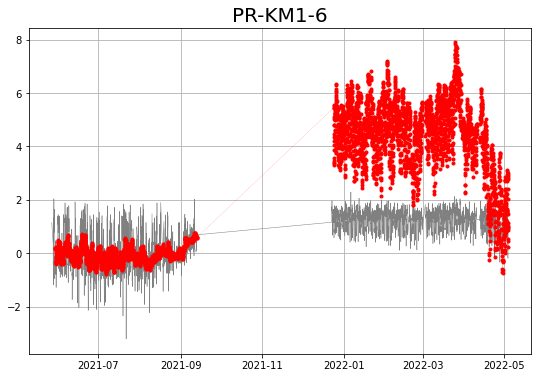

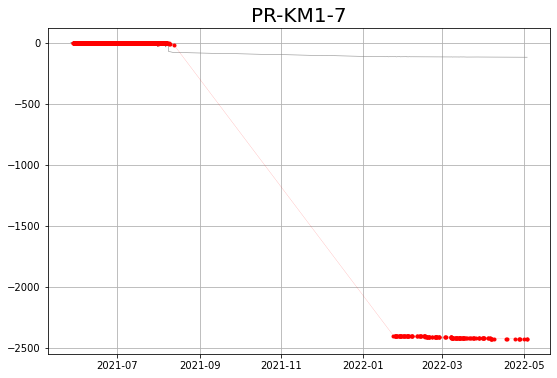

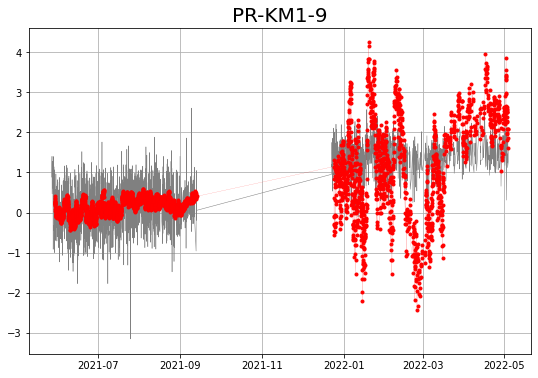

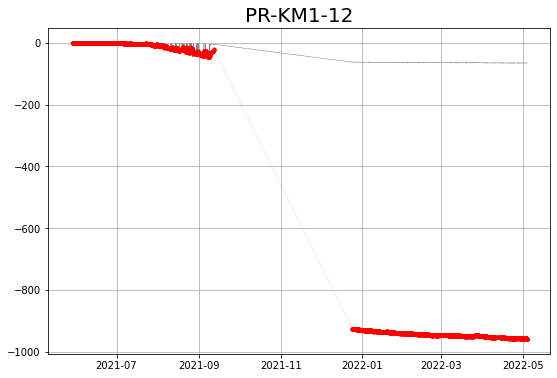

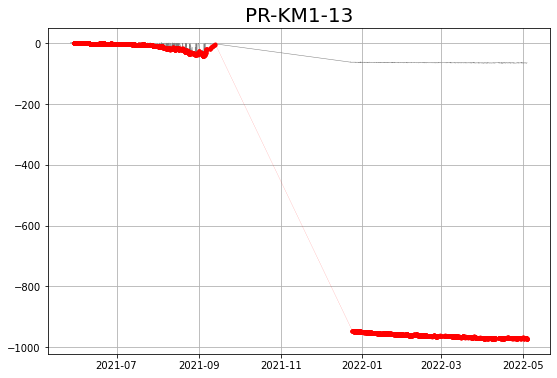

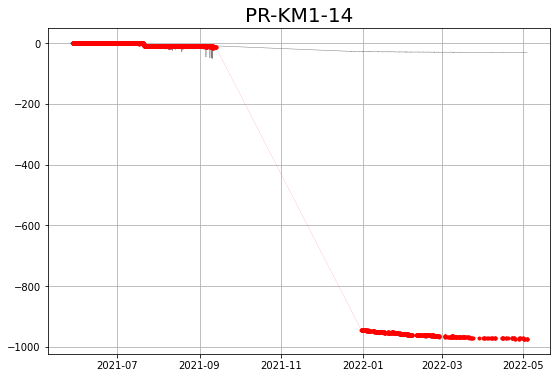

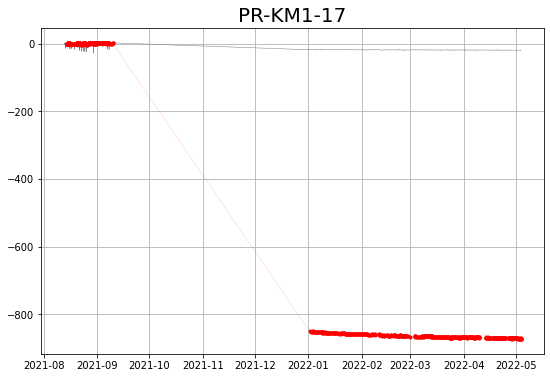

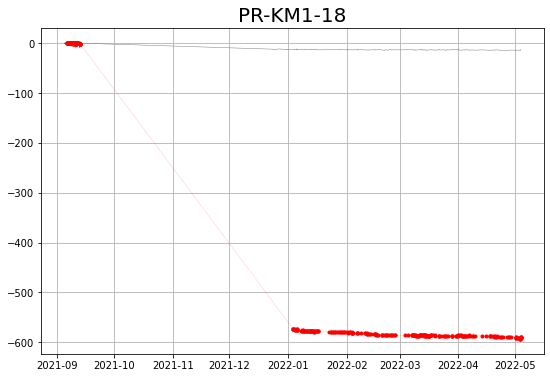

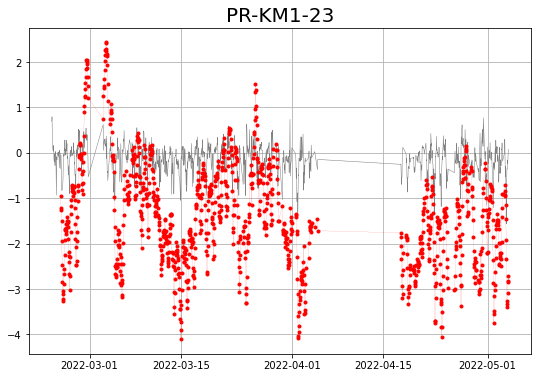

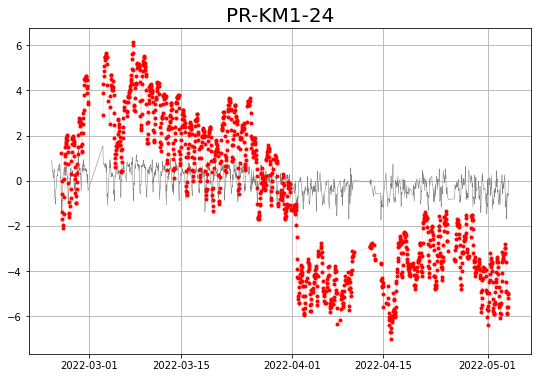

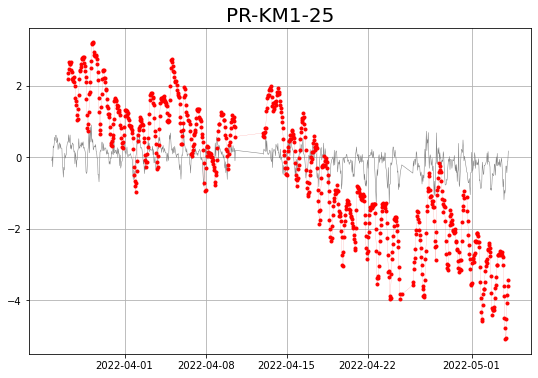

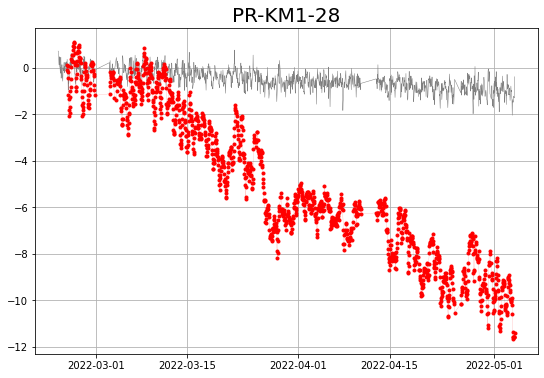

In [ ]:
grafica2=graficas_asentamiento(prisma1,PR1)
grafica2=graficas_asentamiento(prisma2,PR2)
grafica2=graficas_asentamiento(prisma4,PR4)
grafica2=graficas_asentamiento(prisma5,PR5)
grafica2=graficas_asentamiento(prisma6,PR6)
grafica2=graficas_asentamiento(prisma7,PR7)
grafica2=graficas_asentamiento(prisma9,PR9)
grafica2=graficas_asentamiento(prisma12,PR12)
grafica2=graficas_asentamiento(prisma13,PR13)
grafica2=graficas_asentamiento(prisma14,PR14)
grafica2=graficas_asentamiento(prisma17,PR17)
grafica2=graficas_asentamiento(prisma18,PR18)
grafica2=graficas_asentamiento(prisma23,PR23)
grafica2=graficas_asentamiento(prisma24,PR24)
grafica2=graficas_asentamiento(prisma25,PR25)
grafica2=graficas_asentamiento(prisma28,PR28)

#CONCATENAR

In [ ]:
lista1 = [PR1,PR2,PR3,PR4,PR5,PR6,PR7,PR9,PR12,PR13,PR14,PR17,PR18,PR23,PR24,PR25,PR28]
lista2 = [prisma1,prisma2,prisma3,prisma4,prisma5,prisma6,prisma7,prisma9,prisma12,prisma13,prisma14,prisma17,prisma18,prisma23,prisma24,prisma25,prisma28]

for element in lista1:
    element.reset_index(inplace=True)

for elemento  in lista2:
    elemento.reset_index(inplace=True)


In [ ]:
PRISMAS=pd.concat([prisma1,prisma2,prisma3,prisma5,prisma6,prisma7,prisma9,prisma12,prisma13,prisma14,prisma17,prisma18,prisma23,prisma24,prisma25,prisma28],axis=1,sort=False)

eliminar la columna llamada "index"

In [ ]:
PRISMAS=PRISMAS.drop(["index"],axis=1)


concatenar los datos del promedio de medias moviles

In [ ]:
prom_prismas=pd.concat([PR1,PR2,PR3,PR4,PR5,PR6,PR7,PR9,PR12,PR13,PR14,PR17,PR18,PR23,PR24,PR25,PR28],axis=1,sort=False)


In [ ]:
prom_prismas=prom_prismas.drop(["index"],axis=1)

#EXPORTAR A EXCEL


In [ ]:
# with pd.ExcelWriter(path.format("PRISMAS KM0+900.xlsx")) as writer:
#     workbook = xlsxwriter.Workbook(path.format("PRISMAS KM0+900.xlsx"))
#     worksheet = workbook.add_worksheet()
#     worksheet.set_column('A:A', 15)
#     worksheet.set_column('B:B', 15)
#     worksheet.set_column('C:C', 15)
#     worksheet.set_column('D:D', 15)
#     worksheet.set_column('E:E', 15)
#     worksheet.set_column('F:F', 15)
#     worksheet.set_column('G:G', 15)

#     dfPR1.to_excel(writer,sheet_name= "PR1",index=False)
#     PR1.to_excel(writer,sheet_name= "PR1_1",index=False)
#     dfPR2.to_excel(writer,sheet_name= "PR2",index=False)
#     PR2.to_excel(writer,sheet_name= "PR2_P",index=False)
#     dfPR3.to_excel(writer,sheet_name= "PR3",index=False)
#     PR3.to_excel(writer,sheet_name= "PR3_P",index=False)
#     dfPR4.to_excel(writer,sheet_name= "PR4",index=False)
#     PR4.to_excel(writer,sheet_name= "PR4_P",index=False)
#     dfPR5.to_excel(writer,sheet_name= "PR5",index=False)
#     PR5.to_excel(writer,sheet_name= "PR5_P",index=False)
#     dfPR6.to_excel(writer,sheet_name= "PR6",index=False)
#     PR6.to_excel(writer,sheet_name= "PR6_P",index=False)
#     dfPR7.to_excel(writer,sheet_name= "PR7",index=False)
#     PR7.to_excel(writer,sheet_name= "PR7_P",index=False)
#     dfPR9.to_excel(writer,sheet_name= "PR9",index=False)
#     PR9.to_excel(writer,sheet_name= "PR9_P",index=False)
#     dfPR12.to_excel(writer,sheet_name= "PR12",index=False)
#     PR12.to_excel(writer,sheet_name= "PR12_P",index=False)
#     dfPR13.to_excel(writer,sheet_name= "PR13",index=False)
#     PR13.to_excel(writer,sheet_name= "PR13_P",index=False)
#     dfPR14.to_excel(writer,sheet_name= "PR14",index=False)
#     PR14.to_excel(writer,sheet_name= "PR14_P",index=False)
#     dfPR17.to_excel(writer,sheet_name= "PR17",index=False)
#     PR17.to_excel(writer,sheet_name= "PR17_P",index=False)
#     dfPR18.to_excel(writer,sheet_name= "PR18",index=False)
#     PR18.to_excel(writer,sheet_name= "PR18_P",index=False)
#     dfPR23.to_excel(writer,sheet_name= "PR23",index=False)
#     PR23.to_excel(writer,sheet_name= "PR23_P",index=False)
#     dfPR24.to_excel(writer,sheet_name= "PR24",index=False)
#     PR24.to_excel(writer,sheet_name= "PR24_P",index=False)
#     dfPR28.to_excel(writer,sheet_name= "PR28",index=False)
#     PR28.to_excel(writer,sheet_name= "PR28_P",index=False)

In [ ]:
with pd.ExcelWriter(path.format("PRISMAS KM0+900V1.xlsx")) as writer:
    workbook = xlsxwriter.Workbook(path.format("PRISMAS KM0+900.xlsx"))
    worksheet = workbook.add_worksheet()
    PRISMAS.to_excel(writer,sheet_name= "PRISMAS",index=False)
    prom_prismas.to_excel(writer,sheet_name= "PROMEDIO PRISMAS PROCESADOS",index=False)
    df_prismas1.to_excel(writer,sheet_name="CONSOLIDADO",index=False)